In [2]:
import glob
import torch
import numpy as np
import torchvision.transforms as T
import torchvision.transforms.functional as TF

from PIL import Image, ImageFile
from dalle_pytorch import DiscreteVAE
from dalle_pytorch.vae import map_pixels


def preprocess(img):
    s = min(img.size)
    
    if s < target_image_size:
        raise ValueError(f'min dim for image {s} < {target_image_size}')
        
    r = target_image_size / s
    s = (round(r * img.size[1]), round(r * img.size[0]))
    img = TF.resize(img, s, interpolation=Image.LANCZOS)
    img = TF.center_crop(img, output_size=2 * [target_image_size])
    img = torch.unsqueeze(T.ToTensor()(img), 0)
    return map_pixels(img)


target_image_size = 256

model = DiscreteVAE(num_layers=4, codebook_dim=768, hidden_dim=256, num_resnet_blocks=2, num_tokens=8192)
# model.load_state_dict(torch.load('/dalle/vae-final-ds-cp/global_step121623_reports_7M/mp_rank_00_model_states.pt')['module'])

/opt/conda/lib/python3.8/site-packages/torchvision/transforms/functional.py:416: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


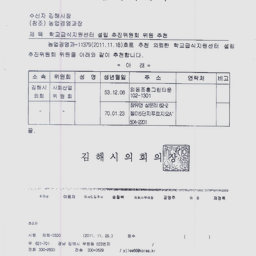

In [4]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

imgs = glob.glob('/dalle/sample_images/*.tif')
# image = Image.open('/disk/nvme2/cdip-images/imagesh/h/r/o/hro91d00/71120064.tif').convert('RGB')
image = Image.open('/dalle/sample_images/public_ocr_sample.jpg').convert('RGB')

img_tens = preprocess(image)

res_img = Image.fromarray((img_tens[0].permute(1,2,0)*255).numpy().astype(np.uint8)).show()


In [2]:
'/disk/nvme2/cdip-images/imagesn/n/d/y/ndy03c00502500001+-2499_0087.tif'.split('.tif')[0]+'.png'

'/disk/nvme2/cdip-images/imagesn/n/d/y/ndy03c00502500001+-2499_0087.png'

In [5]:
aa = model(img_tens, return_loss=True, return_recons=True)

In [7]:
model.encoder(img_tens).shape

torch.Size([1, 8192, 16, 16])

In [43]:
a = model.get_codebook_indices(img_tens)

In [9]:
model.codebook

Embedding(8192, 768)

In [45]:
b = model.decode(a)

In [46]:
a

tensor([[525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525, 525,
         525, 525, 525, 525, 525, 525, 525, 525, 525

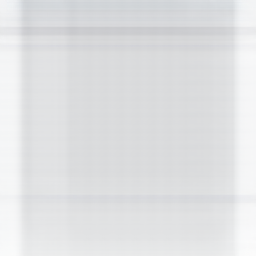

In [47]:
to_pil = T.ToPILImage()
out_img = to_pil((b[0]*255).type(torch.uint8))
out_img.show()

In [54]:
aaa = torch.load('/dalle/vae.pt')

In [63]:
torch.load('/dalle/vae-final-ds-cp/global_step121623_reports_7M/mp_rank_00_model_states.pt')

{'module': OrderedDict([('codebook.weight',
               tensor([[ 0.9791,  0.0747,  0.2431,  ..., -0.5513,  0.0236, -1.4736],
                       [ 1.5385,  1.9243, -0.8285,  ..., -1.2270,  1.9357, -0.3056],
                       [-1.3405, -0.9437, -0.9593,  ..., -1.4712,  0.0240, -0.6564],
                       ...,
                       [-0.5830,  0.8325, -1.4988,  ...,  0.4488,  0.3288, -0.0273],
                       [ 0.7699,  1.6792, -0.7239,  ..., -0.1047,  0.5946,  0.2913],
                       [ 0.4935,  0.0222, -1.7613,  ...,  1.0812, -0.3694,  0.5665]],
                      device='cuda:0')),
              ('encoder.0.0.weight',
               tensor([[[[ 1.1042e-01,  8.3950e-02, -1.0708e-01, -7.1314e-02],
                         [ 4.6623e-02, -1.2926e-01,  7.7019e-02, -6.0846e-02],
                         [-8.2379e-02,  6.2936e-02,  5.7407e-02,  1.1902e-01],
                         [ 7.5767e-02,  1.4814e-02, -1.3727e-01, -1.1031e-01]],
               
      

{'hparams': {'image_size': 224,
  'num_layers': 4,
  'num_tokens': 8192,
  'channels': 3,
  'codebook_dim': 768,
  'hidden_dim': 256,
  'num_resnet_blocks': 2},
 'weights': OrderedDict([('codebook.weight',
               tensor([[ 0.9791,  0.0747,  0.2431,  ..., -0.5513,  0.0236, -1.4736],
                       [ 1.5385,  1.9243, -0.8285,  ..., -1.2270,  1.9357, -0.3056],
                       [-1.3405, -0.9437, -0.9593,  ..., -1.4712,  0.0240, -0.6564],
                       ...,
                       [-0.5830,  0.8325, -1.4988,  ...,  0.4488,  0.3288, -0.0273],
                       [ 0.7699,  1.6792, -0.7239,  ..., -0.1047,  0.5946,  0.2913],
                       [ 0.4935,  0.0222, -1.7613,  ...,  1.0812, -0.3694,  0.5665]],
                      device='cuda:0')),
              ('encoder.0.0.weight',
               tensor([[[[ 1.1042e-01,  8.3950e-02, -1.0708e-01, -7.1314e-02],
                         [ 4.6623e-02, -1.2926e-01,  7.7019e-02, -6.0846e-02],
                   

In [ ]:
imgs = glob.glob('/dalle/sample_images/*')

for image_path in imgs:

    image = Image.open(image_path).convert('RGB')
    img_tens = preprocess(image)

    # display(T.ToPILImage(mode='RGB')(img_tens[0]))
    res_img = Image.fromarray((img_tens[0].permute(1,2,0)*255).numpy().astype(np.uint8))
    res_img.show()
    res_img.save(image_path.split('.png')[0]+'_resiz.png')
    
    a = model.get_codebook_indices(img_tens)
    print(a.shape)
    b = model.decode(a)


    to_pil = T.ToPILImage()
    out_img = to_pil((b[0]*255).type(torch.uint8))
    out_img.show()
    out_img.save(image_path.split('.png')[0]+'_recon.png')